In [125]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data = pd.read_csv("out/data.csv", sep='\s*,\s*', engine='python')
data = data[data['cores'] <= 24]
sns.set_style("whitegrid")

In [126]:
data.loc[data['method'] == 'Serial', 'cores'] = 1
data['avgtime'] = data['time'] / (data['N'])

time_serial = data[data['method'] == 'Serial']['avgtime'].mean()
data['speedup'] = time_serial / data['avgtime']
data['eff'] = data['speedup'] / data['cores']
data.head(200)

cores     method           N        time  iters       avgtime   speedup  \
0        1     Serial      100000    0.023517    100  2.351690e-07  0.635623   
1        1   Critical      100000    0.225892    100  2.258920e-06  0.066173   
2        1  Reduction      100000    0.021019    100  2.101860e-07  0.711174   
3        1     Serial     1000000    0.157213    100  1.572130e-07  0.950804   
4        1   Critical     1000000    1.711220    100  1.711220e-06  0.087352   
..     ...        ...         ...         ...    ...           ...       ...   
156     20  Reduction  1000000000   33.041000    100  3.304100e-08  4.524037   
157      1     Serial  1000000000  238.152000    100  2.381520e-07  0.627661   
158     22  Reduction  1000000000   30.510000    100  3.051000e-08  4.899335   
159      1     Serial  1000000000  160.645000    100  1.606450e-07  0.930491   
160     24  Reduction  1000000000   31.520300    100  3.152030e-08  4.742300   

          eff  
0    0.635623  
1    0.066173  
2    0.711174  
3    0.950804  
4    0.087352  
..        ...  
156  0.226202  
157  0.627661  
158  0.222697  
159  0.930491  
160  0.197596  

[156 rows x 8 columns]

In [127]:
seqLinearTime = []
seqLinearSpeedup = []
for i in data['cores'].unique():
    seqLinearTime.append(time_serial / i)
    seqLinearSpeedup.append(i)
seqLinearTime

[1.4947871562500003e-07,
 7.473935781250001e-08,
 3.7369678906250006e-08,
 2.4913119270833336e-08,
 1.8684839453125003e-08,
 1.4947871562500003e-08,
 1.2456559635416668e-08,
 1.0677051116071431e-08,
 9.342419726562502e-09,
 8.30437309027778e-09,
 7.473935781250002e-09,
 6.794487073863637e-09,
 6.228279817708334e-09]

In [128]:
datacrit = data[(data['method'] == 'Critical') & (data['N'] <= 1000000)]
#datacrit = data[data['N'] == 100000]
datacrit.head()

cores    method        N      time  iters   avgtime   speedup       eff
1       1  Critical   100000  0.225892    100  0.000002  0.066173  0.066173
4       1  Critical  1000000  1.711220    100  0.000002  0.087352  0.087352
14      2  Critical   100000  0.518357    100  0.000005  0.028837  0.014419
17      4  Critical   100000  0.972043    100  0.000010  0.015378  0.003844
20      6  Critical   100000  0.839966    100  0.000008  0.017796  0.002966

# Critical (Runtime + Speedup)

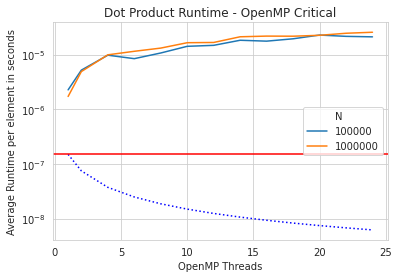

In [129]:
ax1 = sns.lineplot(data=datacrit, x=datacrit['cores'], y=datacrit['avgtime'], hue=datacrit['N'], palette="tab10")
ax1.plot(data['cores'].unique(), seqLinearTime, c="blue", ls=":", mec="gray", mew=0.1)
plt.axhline(y=time_serial, color='r', linestyle='-')
ax1.set(yscale="log", ylabel='Average Runtime per element in seconds', xlabel='OpenMP Threads', title='Dot Product Runtime - OpenMP Critical')
plt.savefig("scaling-critical.pdf", bbox_inches='tight')

In [130]:
plt.clf()

<Figure size 432x288 with 0 Axes>

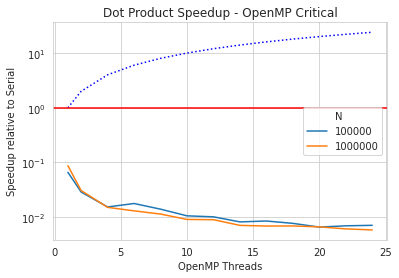

In [131]:
ax1 = sns.lineplot(data=datacrit, x=datacrit['cores'], y=datacrit['speedup'], hue=datacrit['N'], palette="tab10")
ax1.plot(data['cores'].unique(), seqLinearSpeedup, c="blue", ls=":", mec="gray", mew=0.1)
plt.axhline(y=1, color='r', linestyle='-')
ax1.set(yscale="log", ylabel='Speedup relative to Serial', xlabel='OpenMP Threads', title='Dot Product Speedup - OpenMP Critical')
plt.savefig("scaling-critical-su.pdf", bbox_inches='tight')

In [132]:
plt.clf()

<Figure size 432x288 with 0 Axes>

# Reduction (Runtime + Speedup)

In [133]:
datared=data[data['method'] == 'Reduction']
datared.head()

cores     method          N       time  iters       avgtime   speedup  \
2       1  Reduction     100000   0.021019    100  2.101860e-07  0.711174   
5       1  Reduction    1000000   0.125792    100  1.257920e-07  1.188301   
8       1  Reduction   10000000   1.544600    100  1.544600e-07  0.967750   
11      1  Reduction  100000000  15.363800    100  1.536380e-07  0.972928   
13      2  Reduction     100000   0.006840    100  6.839990e-08  2.185365   

         eff  
2   0.711174  
5   1.188301  
8   0.967750  
11  0.972928  
13  1.092682

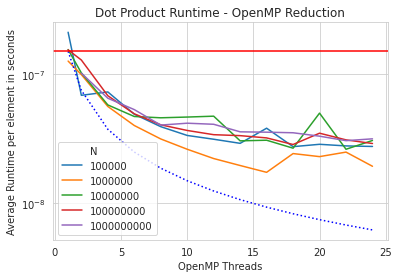

In [134]:
ax = sns.lineplot(data=datared, x=datared['cores'], y=datared['avgtime'], hue=datared['N'], palette="tab10")
ax.plot(data['cores'].unique(), seqLinearTime, c="blue", ls=":", mec="gray", mew=0.1)
plt.axhline(y=time_serial, color='r', linestyle='-')
ax.set(yscale="log", ylabel='Average Runtime per element in seconds', xlabel='OpenMP Threads', 
       title='Dot Product Runtime - OpenMP Reduction')
plt.savefig("scaling-reduction.pdf", bbox_inches='tight')

In [135]:
plt.clf()

<Figure size 432x288 with 0 Axes>

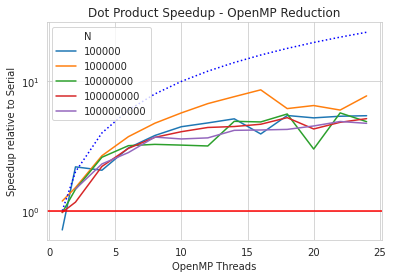

In [136]:
ax = sns.lineplot(data=datared, x=datared['cores'], y=datared['speedup'], hue=datared['N'], palette="tab10")
ax.plot(data['cores'].unique(), seqLinearSpeedup, c="blue", ls=":", mec="gray", mew=0.1)
plt.axhline(y=1, color='r', linestyle='-')
ax.set(yscale="log", ylabel='Speedup relative to Serial', xlabel='OpenMP Threads', 
       title='Dot Product Speedup - OpenMP Reduction')
plt.savefig("scaling-reduction-su.pdf", bbox_inches='tight')

In [137]:
plt.clf()

<Figure size 432x288 with 0 Axes>

# Parallel Efficiency

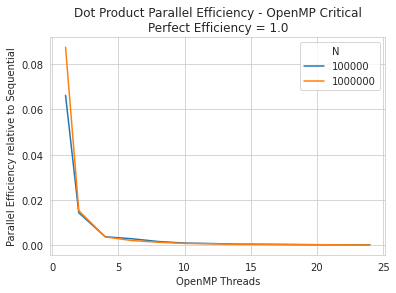

In [138]:
ax = sns.lineplot(data=datacrit, x=datacrit['cores'], y=datacrit['eff'], hue=datacrit['N'], palette="tab10")
#plt.axhline(y=1, color='r', linestyle='-')
ax.set(yscale="linear", ylabel='Parallel Efficiency relative to Sequential',
        xlabel='OpenMP Threads', title='Dot Product Parallel Efficiency - OpenMP Critical\nPerfect Efficiency = 1.0')
plt.savefig("efficiency-critical.pdf", bbox_inches='tight')

In [139]:
plt.clf()

<Figure size 432x288 with 0 Axes>

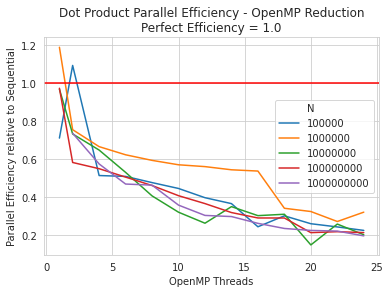

In [140]:
ax = sns.lineplot(data=datared, x=datared['cores'], y=datared['eff'], hue=datared['N'], palette="tab10")
plt.axhline(y=1, color='r', linestyle='-')
ax.set(yscale="linear", ylabel='Parallel Efficiency relative to Sequential',
        xlabel='OpenMP Threads', title='Dot Product Parallel Efficiency - OpenMP Reduction\nPerfect Efficiency = 1.0')
plt.savefig("efficiency-reduction.pdf", bbox_inches='tight')

In [141]:
plt.clf()

<Figure size 432x288 with 0 Axes>